In [779]:
import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest , levene,bartlett

In [780]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_std.csv',index_col=0)
train['target_1'] = train['target_1'].astype(int)
train['target_2'] = train['target_2'].astype(int)
train['target_3'] = train['target_3'].astype(int)
수치형_col = train.select_dtypes(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3970
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               3971 non-null   int32  
 1   target_2               3971 non-null   int32  
 2   target_3               3971 non-null   int32  
 3   회계년도                   3971 non-null   int64  
 4   회사명                    3971 non-null   object 
 5   거래소코드                  3971 non-null   int64  
 6   산업군                    3971 non-null   object 
 7   자본                     3971 non-null   float64
 8   차입금의존도                 3971 non-null   float64
 9   유보율                    3971 non-null   float64
 10  현금비율                   3971 non-null   float64
 11  부채비율                   3971 non-null   float64
 12  당좌비율                   3971 non-null   float64
 13  순운전자본비율                3971 non-null   float64
 14  영업손익                   3971 non-null   float64
 15  감가상각

---
## 정규성 검정
---

In [781]:
# 정규성 검정을 하나의 함수로
def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])


In [782]:
normal_test('kstest',수치형_col)

(    normal
 0  순운전자본비율,
    notnormal
 0         자본
 1     차입금의존도
 2        유보율
 3       현금비율
 4       부채비율
 ..       ...
 64    로그이자비용
 65     로그매출액
 66      로그부채
 67    로그금융원가
 68    로그시가총액
 
 [69 rows x 1 columns])

---
## 등분산성검정
---

In [783]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_std.csv',index_col=0)
train['target_1'] = train['target_1'].astype(int)
train['target_3'] = train['target_3'].astype(int)
train.info()
수치형_col = train.select_dtypes(float)
col_int = 수치형_col.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3970
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               3971 non-null   int32  
 1   target_2               3971 non-null   float64
 2   target_3               3971 non-null   int32  
 3   회계년도                   3971 non-null   int64  
 4   회사명                    3971 non-null   object 
 5   거래소코드                  3971 non-null   int64  
 6   산업군                    3971 non-null   object 
 7   자본                     3971 non-null   float64
 8   차입금의존도                 3971 non-null   float64
 9   유보율                    3971 non-null   float64
 10  현금비율                   3971 non-null   float64
 11  부채비율                   3971 non-null   float64
 12  당좌비율                   3971 non-null   float64
 13  순운전자본비율                3971 non-null   float64
 14  영업손익                   3971 non-null   float64
 15  감가상각

In [784]:
def homoscedasticity_test(df, col,tool):
        dict_1 = {"변수" : [], "p_val" : [], "T" : [] }
        dict_2 = {"변수" : [], "p_val" : [], "T" : [] }
        if tool == "levene":
                for i in col:
                        T, p_val =levene(df[df['target_2']==1][i], df[df['target_2']==0][i]) 
                        dict_1["변수"].append(i)
                        dict_1["p_val"].append(p_val)
                        dict_1["T"].append(T)

                return  pd.DataFrame(dict_1)

        if tool == "bartlett":
                for i in col:
                        T, p_val =bartlett(df[df['target_2']==1][i], df[df['target_2']==0][i]) 
                        dict_2["변수"].append(i)
                        dict_2["p_val"].append(p_val)
                        dict_2["T"].append(T)

                        
                return pd.DataFrame(dict_2) 


In [785]:
## 정규성을 따를때 등분산성 검정
bartlett = homoscedasticity_test(수치형_col,col_int,"bartlett")
bartlett[bartlett['p_val']>0.05]
## 그러나 위에 정규성 검정에서 순운전자본비율을 제외한 변수에서 정규성이 없음

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2507: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2507: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


,변수,p_val,T
11,총자본정상영업이익률,0.710107,0.138170
14,매출액총이익률,0.111327,2.535284
25,금융수익,0.316897,1.001711
39,장단기금리차,0.583395,0.300779
41,업력,0.933727,0.006915
42,누적수익성비율,0.638945,0.220124
47,토빈Q,0.625959,0.237581
49,시총/총자산,0.106763,2.601496
55,PER,0.079706,3.070885
63,영업현금흐름-단기차입금,0.084582,2.974589


In [786]:
# 정규성을 따르지 않을때 등분산성 검정
levene = homoscedasticity_test(수치형_col, col_int,"levene")
등분산변수 = levene[levene['p_val']>0.05]['변수'].to_list()
이분산변수 = levene[levene['p_val']<0.05]['변수'].to_list()

levene[levene['p_val']>0.05]

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2643: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


,변수,p_val,T
8,영업손익,0.152904,2.043826
9,감가상각비,0.101176,2.688149
10,EBITDA,0.120746,2.408656
11,총자본정상영업이익률,0.120337,2.413969
13,총자본순이익률,0.420278,0.649674
16,경영자본순이익률,0.501013,0.452872
19,재고자산회전률,0.474075,0.512559
23,이익잉여금,0.067773,3.337966
24,영업활동으로 인한 현금흐름,0.187054,1.741271
25,금융수익,0.681148,0.168861


---
##t-test
---

In [787]:
import scipy.stats as stats

def t_test(df,col,tool,alpha=0.05):
    dict_1 = {'변수':[],'p_val':[],'t-val':[]}
    dict_2 = {'변수':[],'p_val':[],'t-val':[]}
    if tool == 'student':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_2']==1][i], df[df['target_2']==0][i])
            dict_1["변수"].append(i)
            dict_1["p_val"].append(p_value)
            dict_1["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_1)
        return list

    if tool == 'welch':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_2']==1][i], df[df['target_2']==0][i],equal_var=False)
            dict_2["변수"].append(i)
            dict_2["p_val"].append(p_value)
            dict_2["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_2)
        return list

In [788]:
## 등분산성 t-test
student = t_test(수치형_col,등분산변수,'student')
student[student['p_val']<0.05]

student_변수  = student[student['p_val']<0.05]['변수'].to_list()
student[student['p_val']<0.05]

,변수,p_val,t-val
0,영업손익,8.644643e-04,-3.333824
2,EBITDA,2.021546e-02,-2.323260
3,총자본정상영업이익률,3.689480e-49,-14.942645
4,총자본순이익률,2.745278e-46,-14.470697
5,경영자본순이익률,1.798268e-53,-15.627580
7,이익잉여금,6.223164e-03,-2.737248
10,법인세비용차감전순이익,7.317444e-06,-4.490209
11,당기순이익,3.180585e-07,-5.121171
15,장단기금리차,2.409580e-04,3.675035
17,누적수익성비율,8.538262e-80,-19.350931


In [789]:
## 이분산성 t-test
welch = t_test(수치형_col,이분산변수,'welch')
welch[welch['p_val']<0.05]

welch_변수  = welch[welch['p_val']<0.05]['변수'].to_list()
welch_변수

['자본',
 '차입금의존도',
 '유보율',
 '현금비율',
 '부채비율',
 '당좌비율',
 '순운전자본비율',
 '자기자본순이익률',
 '매출액총이익률',
 '금융비용부담률',
 '자본금회전률',
 '타인자본회전률',
 '총자본회전률',
 '외국인지분율',
 '대주주지분율',
 '유형자산증가율',
 '매출액증가율',
 '총자본증가율',
 '정상영업이익증가율',
 'cpi',
 '현금흐름 대 자산',
 '현금흐름 대 매출액',
 'TMD',
 'RD',
 '직원수변동률%',
 'PBR변화율',
 'abs(영업현금흐름-당기순이익)/매출액',
 '로그시가총액']

In [790]:
t_검정변수 = student_변수 + welch_변수
t_검정변수

['영업손익',
 'EBITDA',
 '총자본정상영업이익률',
 '총자본순이익률',
 '경영자본순이익률',
 '이익잉여금',
 '법인세비용차감전순이익',
 '당기순이익',
 '장단기금리차',
 '누적수익성비율',
 '토빈Q',
 '시총/총자산',
 'EBIT/총자산',
 '당기전기영업손익',
 '현금흐름/총부채비율',
 '로그이자비용',
 '로그매출액',
 '로그금융원가',
 '자본',
 '차입금의존도',
 '유보율',
 '현금비율',
 '부채비율',
 '당좌비율',
 '순운전자본비율',
 '자기자본순이익률',
 '매출액총이익률',
 '금융비용부담률',
 '자본금회전률',
 '타인자본회전률',
 '총자본회전률',
 '외국인지분율',
 '대주주지분율',
 '유형자산증가율',
 '매출액증가율',
 '총자본증가율',
 '정상영업이익증가율',
 'cpi',
 '현금흐름 대 자산',
 '현금흐름 대 매출액',
 'TMD',
 'RD',
 '직원수변동률%',
 'PBR변화율',
 'abs(영업현금흐름-당기순이익)/매출액',
 '로그시가총액']

---
## 다중공선성 상관계수 확인
---

In [791]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_std.csv',index_col=0)
test = pd.read_csv('./datasets/전처리완료/코스피_test_std.csv',index_col=0)
명목형_col = [['회사명','거래소코드','회계년도','산업군','target_1','target_2','target_3']]

수치형_col = train[t_검정변수]
수치형_col 

,영업손익,EBITDA,총자본정상영업이익률,총자본순이익률,경영자본순이익률,이익잉여금,법인세비용차감전순이익,당기순이익,장단기금리차,누적수익성비율,...,정상영업이익증가율,cpi,현금흐름 대 자산,현금흐름 대 매출액,TMD,RD,직원수변동률%,PBR변화율,abs(영업현금흐름-당기순이익)/매출액,로그시가총액
0,-0.365269,-0.117256,-1.175898,-1.140240,-1.021520,-0.451386,-0.389942,-0.349509,0.384425,-2.994387,...,0.201532,-1.467240,0.182363,0.785420,0.396575,-0.469719,-0.806879,-0.209738,1.402429,0.005855
1,-0.350544,-0.151625,-1.080206,-2.115748,-1.858067,-0.342856,-0.465986,-0.498310,1.924426,-1.387117,...,0.083522,-0.960350,-0.450666,-0.049739,0.205794,4.982061,-0.596397,1.474404,1.986204,0.113600
2,-0.215395,-0.058719,0.028575,-2.125846,-1.888431,-0.372397,-0.483680,-0.480933,0.343540,-1.729005,...,2.579816,-0.457278,-0.074205,0.286534,0.803603,3.989899,-0.573134,-0.023781,1.920645,-0.190269
3,-0.020872,0.092442,1.740632,1.996329,1.639943,-0.329110,-0.006130,0.105401,-0.051682,-1.253671,...,0.716577,-0.175201,1.744486,2.071611,-0.298049,4.022841,-0.119573,0.972532,-0.304448,0.511676
4,0.095385,0.175627,2.739158,1.206633,0.944592,-0.296183,-0.076855,-0.005076,0.002831,-0.892571,...,0.081186,0.215889,3.025079,3.209563,-0.383260,3.743360,0.004561,-0.515634,1.755908,0.577504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,-0.279664,-0.240622,-0.171131,0.061472,0.132337,-0.286666,-0.224895,-0.207070,1.924426,-0.522833,...,-0.288711,-0.960350,-0.103779,-0.328523,0.670203,-0.469719,-0.383587,0.578761,-0.643603,-0.587254
3967,-0.281513,-0.246873,-0.266823,0.004921,0.047316,-0.280561,-0.227400,-0.206515,0.343540,-0.496999,...,-0.114037,-0.457278,-0.897985,-0.753662,0.006258,-0.469719,0.512231,2.351393,-0.516502,-0.089094
3968,-0.274960,-0.233402,-0.285545,-0.308130,-0.285177,-0.277268,-0.244714,-0.229048,-0.051682,-0.569993,...,-0.028680,-0.175201,-0.176484,-0.264214,0.671769,-0.469719,0.367115,-0.934756,-0.443146,-0.341299
3969,-0.312557,-0.250297,-0.759845,-0.998862,-0.941054,-0.283985,-0.314868,-0.308735,0.002831,-0.747269,...,-0.432571,0.215889,-0.934315,-0.780864,1.301525,-0.469719,0.903117,-0.656183,-0.549993,-0.441458


In [792]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3970
Data columns (total 77 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               3971 non-null   float64
 1   target_2               3971 non-null   float64
 2   target_3               3971 non-null   float64
 3   회계년도                   3971 non-null   int64  
 4   회사명                    3971 non-null   object 
 5   거래소코드                  3971 non-null   int64  
 6   산업군                    3971 non-null   object 
 7   자본                     3971 non-null   float64
 8   차입금의존도                 3971 non-null   float64
 9   유보율                    3971 non-null   float64
 10  현금비율                   3971 non-null   float64
 11  부채비율                   3971 non-null   float64
 12  당좌비율                   3971 non-null   float64
 13  순운전자본비율                3971 non-null   float64
 14  영업손익                   3971 non-null   float64
 15  감가상각

In [793]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(수치형_col.values, i) for i in range(수치형_col.shape[1])]
vif["features"] = 수치형_col.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,96.900412,시총/총자산
1,82.326659,토빈Q
2,44.361343,로그매출액
3,37.577977,로그시가총액
4,31.434605,영업손익
5,30.853918,법인세비용차감전순이익
6,30.711700,총자본순이익률
7,25.241597,당기전기영업손익
8,19.553687,자본
9,19.462784,당기순이익


In [794]:
drop_col = ['시총/총자산','로그매출액','자본','영업손익','법인세비용차감전순이익','총자본순이익률','로그이자비용','당기순이익','총자본회전률']

In [795]:
##
수치형_col = 수치형_col.drop(drop_col,axis=1)

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(수치형_col.values, i) for i in range(수치형_col.shape[1])]
vif["features"] = 수치형_col.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,9.075162,EBIT/총자산
1,6.988793,현금흐름 대 자산
2,6.891915,당기전기영업손익
3,6.651214,이익잉여금
4,6.554837,경영자본순이익률
5,6.325261,현금흐름/총부채비율
6,6.104468,로그금융원가
7,5.978593,로그시가총액
8,5.892827,총자본정상영업이익률
9,5.085892,현금흐름 대 매출액


C:\Users\msi\AppData\Local\Temp\ipykernel_13320\920581377.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation of Features'}>

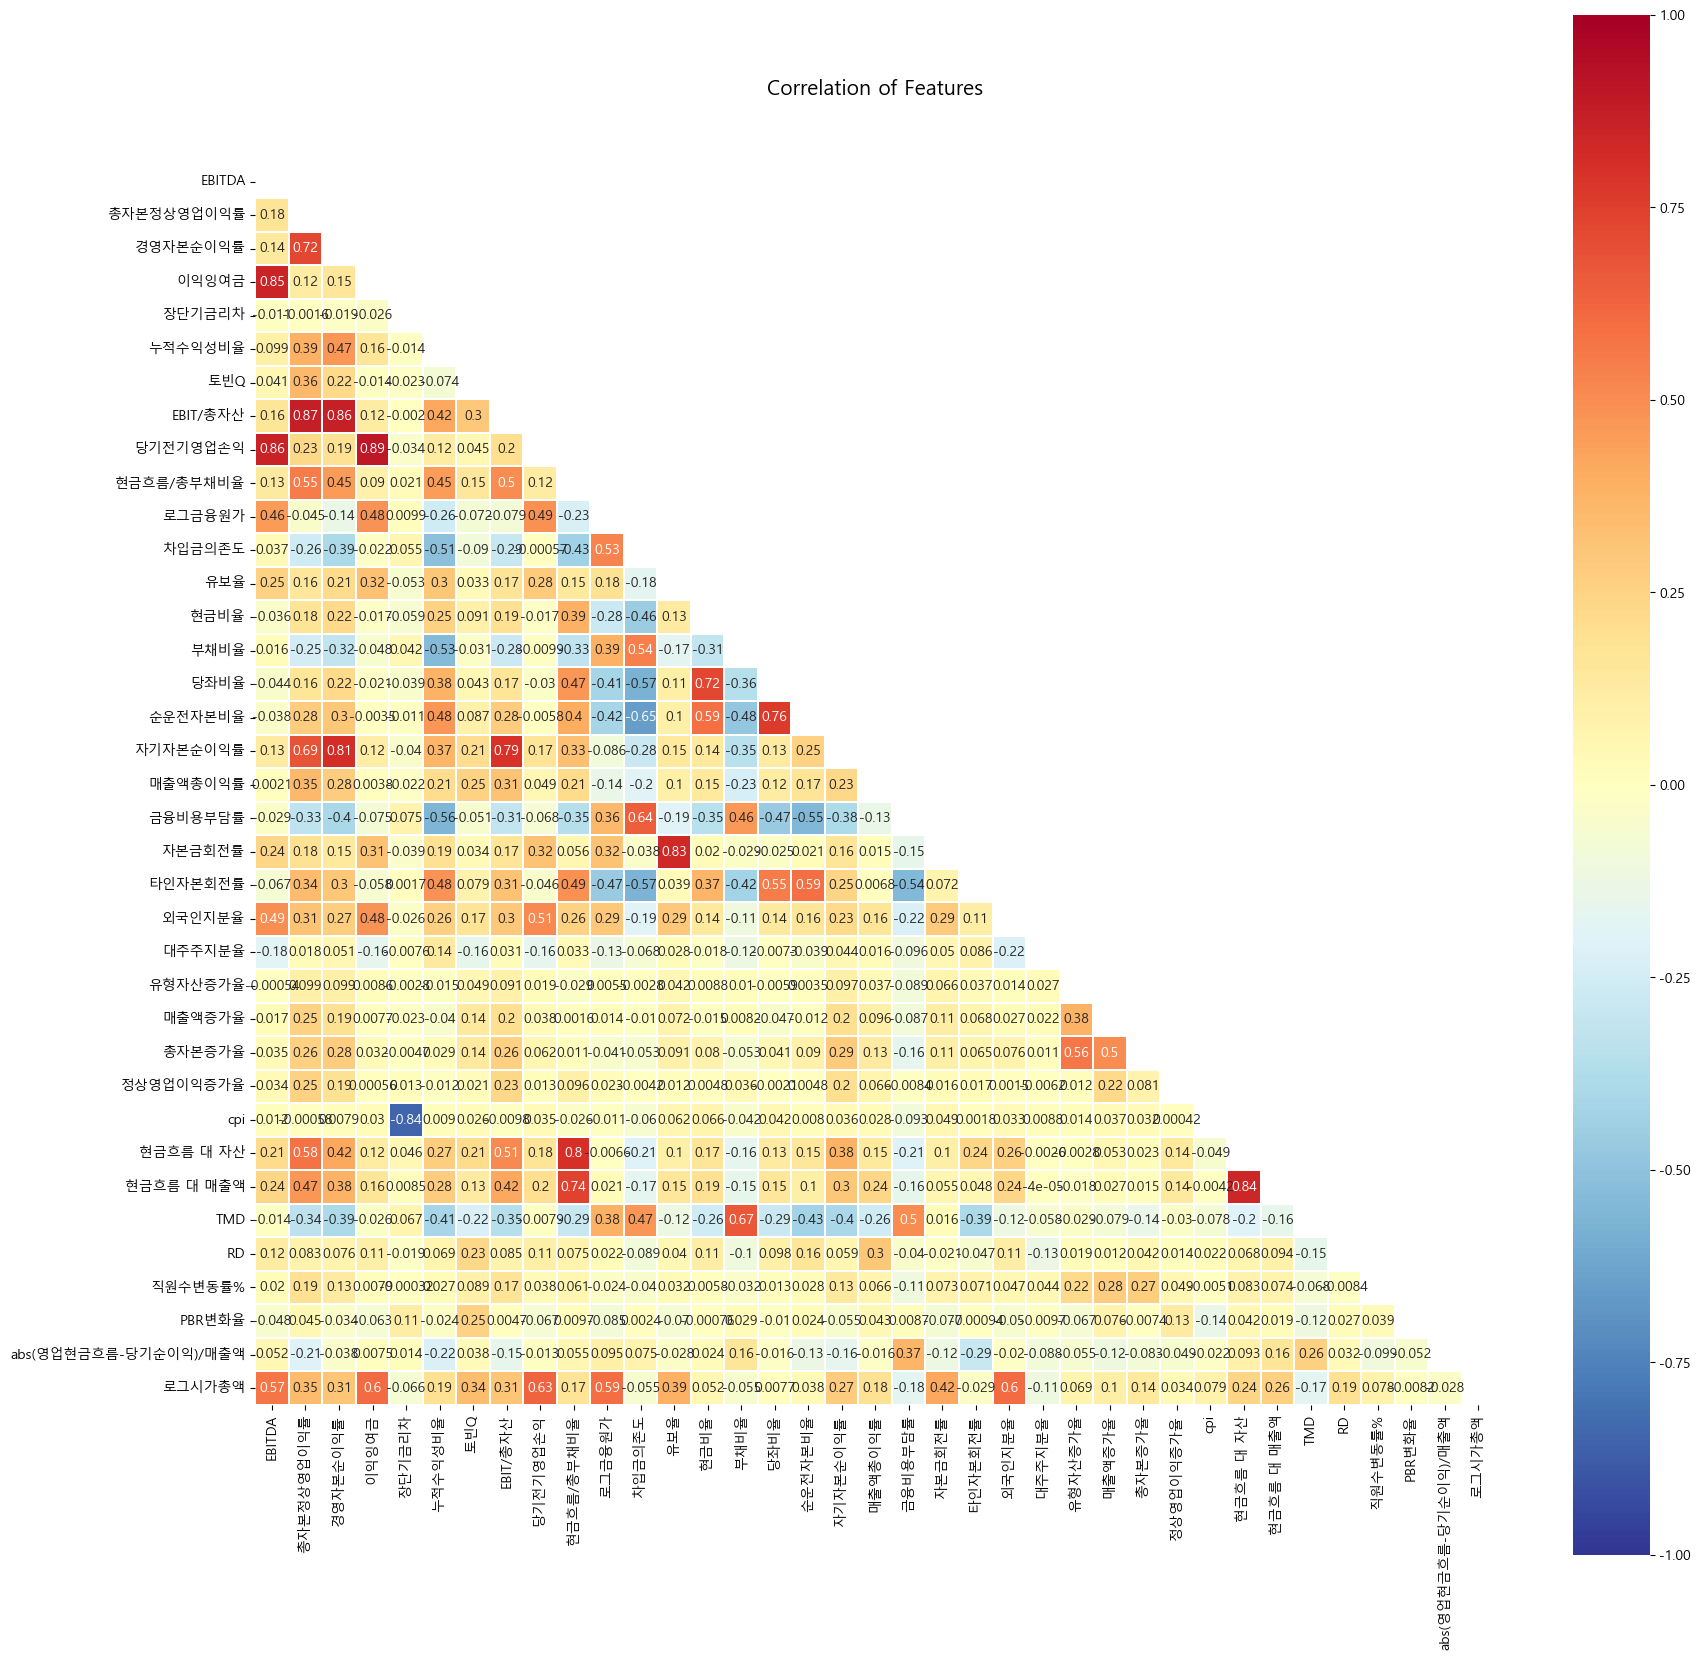

In [796]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colormap = plt.cm.hot

corr = 수치형_col.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(20, 20))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(corr, mask=mask, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,
            cmap='RdYlBu_r', linecolor="white", annot=True, annot_kws={'size': 10})

In [797]:
last_col = 명목형_col[0]+vif['features'].to_list()

In [798]:
train = train[last_col]
test = test[last_col]

In [799]:
train.to_csv('./datasets/통계검증완료/코스피_standar_train.csv',encoding='utf-8-sig')
test.to_csv('./datasets/통계검증완료/코스피_standar_test.csv',encoding='utf-8-sig')